<img src="https://github.com/LucaScaldaferri/Curso_Cientista_de_Dados/blob/main/logo_ebac.png?raw=true" alt="ebac-logo">


---

# **Profissão Cientista de Dados**
## **Módulo** 12 | Regressão I | Exercício 2
Resolução Caderno de **Exercícios**<br> 
Aluno [Lucas Scaldaferri Magalhães Freitas](https://www.linkedin.com/in/0scaldaferri-lucas/) <br>

---

# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

tips = sns.load_dataset("tips")
df = tips.rename(columns={'total_bill': 'total_conta',
                        'tip': 'gorjeta',
                        'sex': 'sexo',
                        'smoker': 'fumante',
                        'day': 'dia',
                        'time': 'periodo',
                        'size': 'tamanho'})

df['gorjeta_pct'] = df['gorjeta'] / (df['total_conta'] - df['gorjeta'])
df['conta'] = df['total_conta'] - df['gorjeta']
df.head()

,total_conta,gorjeta,sexo,fumante,dia,periodo,tamanho,gorjeta_pct,conta
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


                            OLS Regression Results                            
Dep. Variable:            gorjeta_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.52e-06
Time:                        16:32:49   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

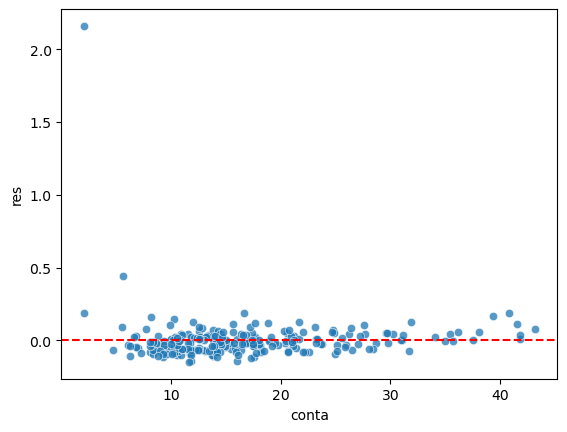

In [10]:
reg = smf.ols('gorjeta_pct ~ conta', df).fit()
print(reg.summary())

df['res'] = reg.resid

sns.scatterplot(x='conta', y='res', data=df, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

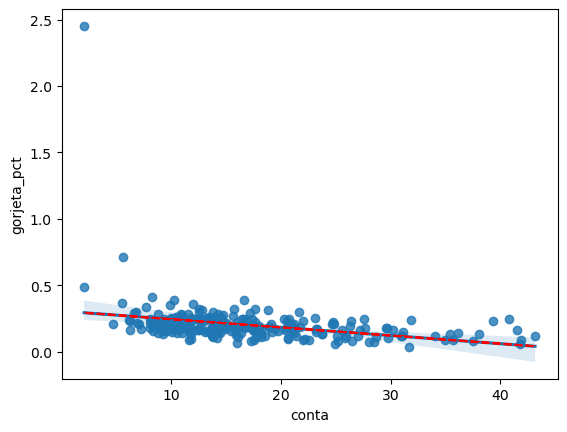

In [12]:
sns.regplot(x = 'conta', y = 'gorjeta_pct', data = df)
plt.plot(df['conta'], reg.fittedvalues, 'r,--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:            gorjeta_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.62e-13
Time:                        16:34:52   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6181      0.054     11.444

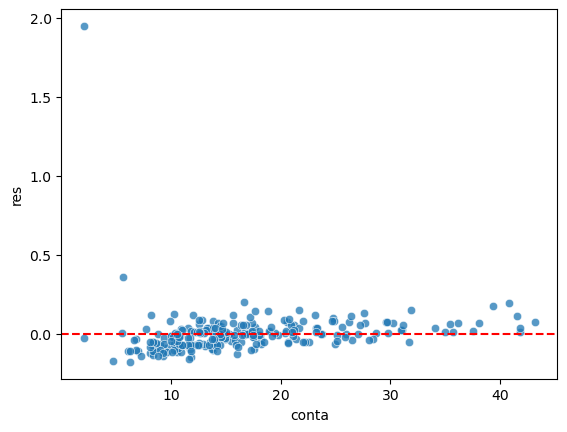

In [16]:
reg = smf.ols('gorjeta_pct ~ np.log(conta)', df).fit()
print(reg.summary())

df['res'] = reg.resid

sns.scatterplot(x='conta', y='res', data=df, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

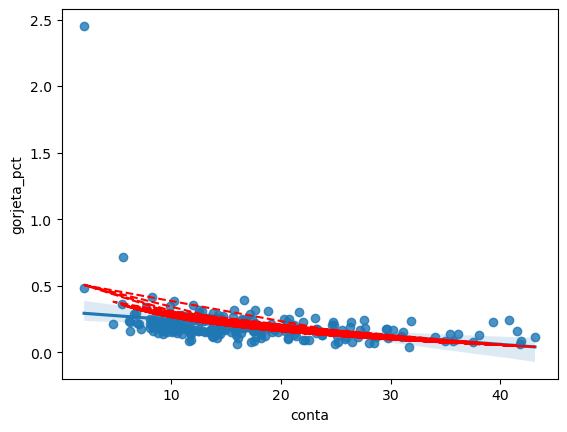

In [17]:
sns.regplot(x = 'conta', y = 'gorjeta_pct', data = df)
plt.plot(df['conta'], reg.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:            gorjeta_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.06e-09
Time:                        16:36:23   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4851      0

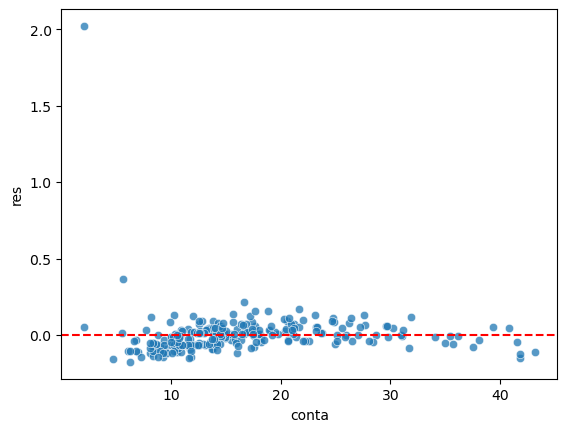

In [20]:
reg = smf.ols('gorjeta_pct ~ conta + np.power(conta,2)', df).fit()
print(reg.summary())

df['res'] = reg.resid

sns.scatterplot(x='conta', y='res', data=df, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

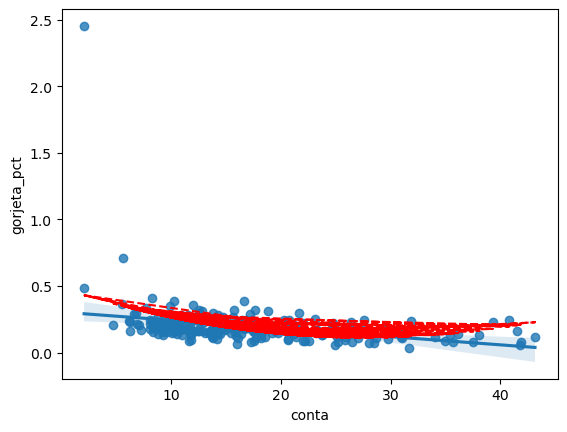

In [21]:
sns.regplot(x = 'conta', y = 'gorjeta_pct', data = df)
plt.plot(df['conta'], reg.fittedvalues, 'r,--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                             OLS Regression Results                            
Dep. Variable:     np.log(gorjeta_pct)   R-squared:                       0.235
Model:                             OLS   Adj. R-squared:                  0.232
Method:                  Least Squares   F-statistic:                     74.48
Date:                 Wed, 12 Apr 2023   Prob (F-statistic):           8.27e-16
Time:                         16:37:54   Log-Likelihood:                -106.00
No. Observations:                  244   AIC:                             216.0
Df Residuals:                      242   BIC:                             223.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.87

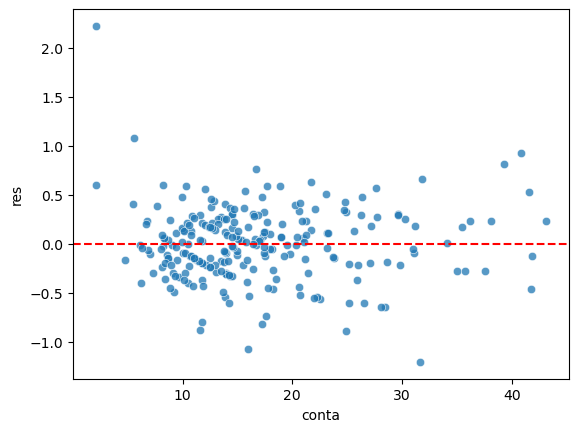

In [22]:
reg = smf.ols('np.log(gorjeta_pct) ~ conta', df).fit()
print(reg.summary())

df['res'] = reg.resid

sns.scatterplot(x='conta', y='res', data=df, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

In [24]:
df['pred_gorjeta_pct'] = np.exp(reg.fittedvalues)
df[['pred_gorjeta_pct', 'gorjeta_pct']].corr().iloc[0,1]**2

0.11440988592529759

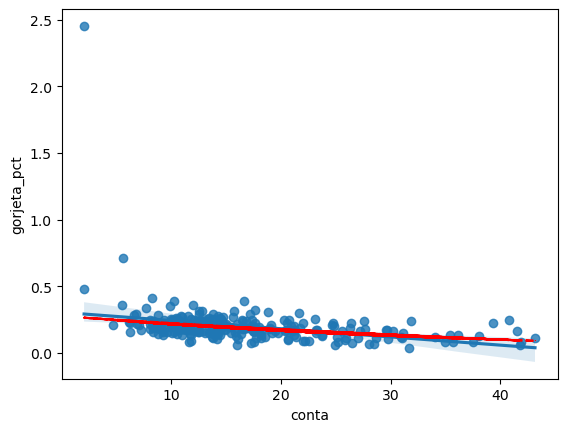

In [28]:
sns.regplot(x = 'conta', y = 'gorjeta_pct', data = df)
plt.plot(df['conta'], df['pred_gorjeta_pct'], 'r,--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                             OLS Regression Results                            
Dep. Variable:     np.log(gorjeta_pct)   R-squared:                       0.293
Model:                             OLS   Adj. R-squared:                  0.291
Method:                  Least Squares   F-statistic:                     100.5
Date:                 Wed, 12 Apr 2023   Prob (F-statistic):           5.20e-20
Time:                         16:42:07   Log-Likelihood:                -96.357
No. Observations:                  244   AIC:                             196.7
Df Residuals:                      242   BIC:                             203.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3942      0.133 

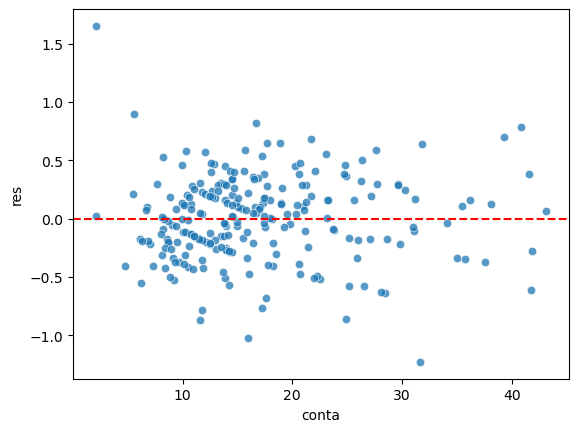

In [29]:
reg = smf.ols('np.log(gorjeta_pct) ~ np.log(conta)', df).fit()
print(reg.summary())

df['res'] = reg.resid

sns.scatterplot(x='conta', y='res', data=df, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

In [30]:
df['pred_gorjeta_pct'] = np.exp(reg.fittedvalues)
df[['pred_gorjeta_pct', 'gorjeta_pct']].corr().iloc[0,1]**2

0.30894874740322287

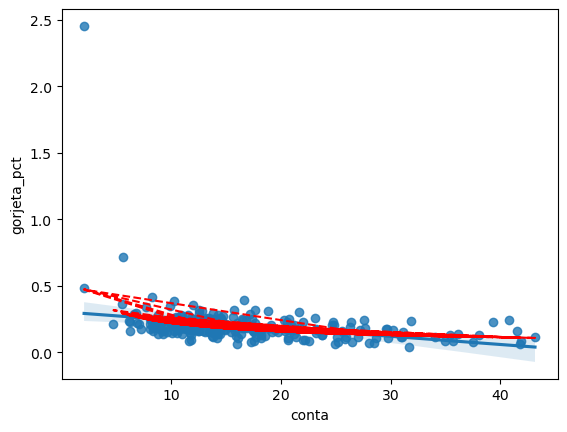

In [31]:
sns.regplot(x = 'conta', y = 'gorjeta_pct', data = df)
plt.plot(df['conta'], df['pred_gorjeta_pct'], 'r,--')

###  6. qual modelo resultou no melhor ajuste?

O último modelo resultou no melhor ajuste com R² igual a 30,89%